In [2]:
import yfinance as yf

data = yf.download(tickers = "GC=F", start="2017-12-01", end="2023-06-02", interval='1d')

[*********************100%***********************]  1 of 1 completed


In [3]:
data = data.reset_index('Date', inplace=False)

In [4]:
df = data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Bidirectional

In [6]:
df1=df.reset_index()['Close']

In [7]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [9]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [10]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [11]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [12]:
# 8. Define LSTM Model
# Define the model
model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100,1)))

# Add a max pooling layer
model.add(MaxPooling1D(pool_size=2))

# Add another 1D convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

# Add a bidirectional LSTM layer
model.add(Bidirectional(LSTM(100, activation='relu')))

# Add a dense output layer
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [13]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 10s 362ms/step - loss: 0.1163 - val_loss: 0.0268
Epoch 2/100
14/14 [==============================] - 3s 183ms/step - loss: 0.0126 - val_loss: 0.0171
Epoch 3/100
14/14 [==============================] - 2s 140ms/step - loss: 0.0066 - val_loss: 0.0082
Epoch 4/100
14/14 [==============================] - 2s 154ms/step - loss: 0.0043 - val_loss: 0.0055
Epoch 5/100
14/14 [==============================] - 2s 137ms/step - loss: 0.0035 - val_loss: 0.0048
Epoch 6/100
14/14 [==============================] - 2s 127ms/step - loss: 0.0026 - val_loss: 0.0042
Epoch 7/100
14/14 [==============================] - 2s 149ms/step - loss: 0.0022 - val_loss: 0.0038
Epoch 8/100
14/14 [==============================] - 2s 162ms/step - loss: 0.0020 - val_loss: 0.0025
Epoch 9/100
14/14 [==============================] - 2s 171ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 10/100
14/14 [==============================] - 2s 165ms/step - loss: 0.0019 - val_l

14/14 [==============================] - 2s 163ms/step - loss: 5.5270e-04 - val_loss: 5.9641e-04
Epoch 79/100
14/14 [==============================] - 2s 122ms/step - loss: 5.3818e-04 - val_loss: 6.5691e-04
Epoch 80/100
14/14 [==============================] - 2s 143ms/step - loss: 5.8703e-04 - val_loss: 0.0014
Epoch 81/100
14/14 [==============================] - 2s 162ms/step - loss: 5.9416e-04 - val_loss: 7.4358e-04
Epoch 82/100
14/14 [==============================] - 2s 127ms/step - loss: 5.2343e-04 - val_loss: 7.1051e-04
Epoch 83/100
14/14 [==============================] - 2s 134ms/step - loss: 5.8180e-04 - val_loss: 9.9311e-04
Epoch 84/100
14/14 [==============================] - 2s 130ms/step - loss: 5.7915e-04 - val_loss: 5.9791e-04
Epoch 85/100
14/14 [==============================] - 2s 129ms/step - loss: 5.3566e-04 - val_loss: 5.7685e-04
Epoch 86/100
14/14 [==============================] - 2s 124ms/step - loss: 5.9886e-04 - val_loss: 5.6745e-04
Epoch 87/100
14/14 [=======

In [15]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 14ms/step


In [16]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [17]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

yval = scaler.inverse_transform(yval.reshape(-1,1))

In [18]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 36.29379360029349
Testing RMSE: 23.57615468743067


In [19]:
from sklearn.metrics import mean_absolute_error
valid_mae = mean_absolute_error(yval, y_pred_val)
test_mae = mean_absolute_error(ytest, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 31.649241912059342
Testing MAE: 18.453711635044634


In [20]:
from sklearn.metrics import mean_absolute_percentage_error

In [21]:
valid_mape = mean_absolute_percentage_error(yval, y_pred_val)
test_mape = mean_absolute_percentage_error(ytest, y_pred)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 0.01580134526978525
Testing MAPE: 0.01014854571755386


In [22]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[40:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.8752495]
101
1 day input [0.79789785 0.8217754  0.84793789 0.84108309 0.83514219 0.83194337
 0.85216495 0.85707761 0.85787728 0.8656461  0.87398601 0.86016221
 0.85959098 0.85307898 0.86061922 0.85867709 0.84553874 0.78453106
 0.78830111 0.79458467 0.80109681 0.78830111 0.78441684 0.77196394
 0.77436309 0.75174222 0.7606535  0.75882559 0.75037132 0.74922885
 0.73323433 0.72272371 0.73209187 0.74568724 0.75574085 0.75094255
 0.7671655  0.76739408 0.72855025 0.72717921 0.74614425 0.78350281
 0.84028328 0.83399972 0.85730605 0.84862334 0.90666063 0.9173997
 0.87033018 0.88038393 0.9340798  0.92071287 0.88678171 0.90963102
 0.90243343 0.91865652 0.90574661 0.92276937 0.96652571 0.96504059
 0.9547584  0.92871013 0.94664692 0.95361593 0.98834691 0.9436764
 0.93453668 0.9496173  0.93567914 0.94984574 0.91774249 0.92871013
 0.93430824 0.92482572 0.92962416 0.9298526  0.92219814 0.95750034
 0.97383751 0.99600137 0.96104196 0.97120993 0.98252022 0.97600823
 0.95795722 0.95772878 0.96172741 0.

9 day output [[0.71682954]]
10 day input [0.8656461  0.87398601 0.86016221 0.85959098 0.85307898 0.86061922
 0.85867709 0.84553874 0.78453106 0.78830111 0.79458467 0.80109681
 0.78830111 0.78441684 0.77196394 0.77436309 0.75174222 0.7606535
 0.75882559 0.75037132 0.74922885 0.73323433 0.72272371 0.73209187
 0.74568724 0.75574085 0.75094255 0.7671655  0.76739408 0.72855025
 0.72717921 0.74614425 0.78350281 0.84028328 0.83399972 0.85730605
 0.84862334 0.90666063 0.9173997  0.87033018 0.88038393 0.9340798
 0.92071287 0.88678171 0.90963102 0.90243343 0.91865652 0.90574661
 0.92276937 0.96652571 0.96504059 0.9547584  0.92871013 0.94664692
 0.95361593 0.98834691 0.9436764  0.93453668 0.9496173  0.93567914
 0.94984574 0.91774249 0.92871013 0.93430824 0.92482572 0.92962416
 0.9298526  0.92219814 0.95750034 0.97383751 0.99600137 0.96104196
 0.97120993 0.98252022 0.97600823 0.95795722 0.95772878 0.96172741
 0.92791046 0.9191134  0.89146579 0.91682846 0.91237296 0.90963102
 0.89866338 0.87615673 

18 day output [[0.65179]]
19 day input [0.78830111 0.79458467 0.80109681 0.78830111 0.78441684 0.77196394
 0.77436309 0.75174222 0.7606535  0.75882559 0.75037132 0.74922885
 0.73323433 0.72272371 0.73209187 0.74568724 0.75574085 0.75094255
 0.7671655  0.76739408 0.72855025 0.72717921 0.74614425 0.78350281
 0.84028328 0.83399972 0.85730605 0.84862334 0.90666063 0.9173997
 0.87033018 0.88038393 0.9340798  0.92071287 0.88678171 0.90963102
 0.90243343 0.91865652 0.90574661 0.92276937 0.96652571 0.96504059
 0.9547584  0.92871013 0.94664692 0.95361593 0.98834691 0.9436764
 0.93453668 0.9496173  0.93567914 0.94984574 0.91774249 0.92871013
 0.93430824 0.92482572 0.92962416 0.9298526  0.92219814 0.95750034
 0.97383751 0.99600137 0.96104196 0.97120993 0.98252022 0.97600823
 0.95795722 0.95772878 0.96172741 0.92791046 0.9191134  0.89146579
 0.91682846 0.91237296 0.90963102 0.89866338 0.87615673 0.87729919
 0.89317949 0.89992006 0.91602879 0.87524951 0.86577088 0.82544738
 0.80623877 0.78144288 0.

27 day output [[0.6065805]]
28 day input [0.75882559 0.75037132 0.74922885 0.73323433 0.72272371 0.73209187
 0.74568724 0.75574085 0.75094255 0.7671655  0.76739408 0.72855025
 0.72717921 0.74614425 0.78350281 0.84028328 0.83399972 0.85730605
 0.84862334 0.90666063 0.9173997  0.87033018 0.88038393 0.9340798
 0.92071287 0.88678171 0.90963102 0.90243343 0.91865652 0.90574661
 0.92276937 0.96652571 0.96504059 0.9547584  0.92871013 0.94664692
 0.95361593 0.98834691 0.9436764  0.93453668 0.9496173  0.93567914
 0.94984574 0.91774249 0.92871013 0.93430824 0.92482572 0.92962416
 0.9298526  0.92219814 0.95750034 0.97383751 0.99600137 0.96104196
 0.97120993 0.98252022 0.97600823 0.95795722 0.95772878 0.96172741
 0.92791046 0.9191134  0.89146579 0.91682846 0.91237296 0.90963102
 0.89866338 0.87615673 0.87729919 0.89317949 0.89992006 0.91602879
 0.87524951 0.86577088 0.82544738 0.80623877 0.78144288 0.76447529
 0.747536   0.73737901 0.72453249 0.71682954 0.70666414 0.70021921
 0.69214505 0.6858663 

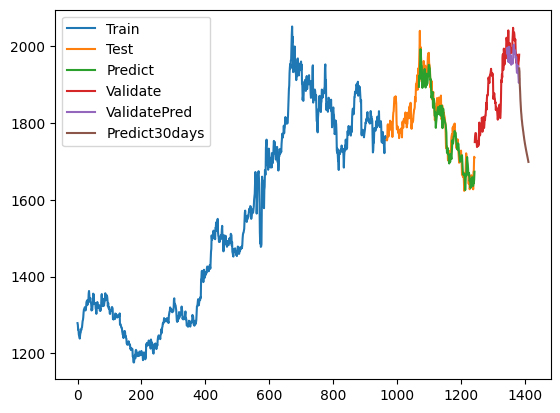

In [23]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

In [24]:
scaler.inverse_transform(lst_output)

array([[1942.30588567],
       [1934.00924157],
       [1898.71408367],
       [1881.90078634],
       [1860.19694274],
       [1845.34520634],
       [1830.51825161],
       [1821.62783856],
       [1810.38327068],
       [1803.64088109],
       [1794.74311179],
       [1789.10186334],
       [1782.03454686],
       [1776.53875381],
       [1769.37997989],
       [1763.78109507],
       [1757.26434916],
       [1752.21488712],
       [1746.71179   ],
       [1742.05403495],
       [1737.19427012],
       [1732.71776043],
       [1728.07889163],
       [1723.90195326],
       [1719.53437859],
       [1715.5853273 ],
       [1711.50062894],
       [1707.13988879],
       [1702.86335418],
       [1698.67467712]])